<!-- <div style='float:right'><img width=200 src="hse-logo.jpg" alt="HSE logo"></img></div> -->
<div style='float:left'><img width=400 src="python_logo.png" alt="Python"></img></div>

<div style='float:right'>

<h1 align='center'>Язык программирования Python</h1>

<h2 align='right'>Бобер Станислав Алексеевич</h2>
<h3 align='right'>Ст. преп. Департамента Прикладной Математики</h3>
<h3 align='right'>e-mail: sbober@hse.ru, stas.bober@gmail.com</h3>
</div>

# Семинар 6

Теоретическая часть:
[Лекция 5](https://github.com/BoberSA/PythonCourse/blob/master/Lecture_5/Lecture_5.ipynb)
[Лекция 6](https://github.com/BoberSA/PythonCourse/blob/master/Lecture_6/Lecture_6.ipynb)

# Темы семинара:

### 0. Pandas

### Задание 0. Графики температур

Дан текстовый файл:
[Температура в Стокгольме более чем за 200 лет](https://github.com/jrjohansson/scientific-python-lectures/blob/master/stockholm_td_adj.dat)

Требуется:
Используя возможности модуля **Pandas** (напр., groupby, pivot, и др.), на одном рисунке для каждого месяца изобразить график изменения температур в течение месяца, усредненный по всем годам. Подписать оси и озаглавить рисунок.

Названия месяцев можно взять из модуля **calendar**. Например, calendar.month_name[2] вернет 'February'.

Пример результата:

<img src='mean_temp_stockholm.png' width=900></img>

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

In [107]:
df = pd.read_csv("stockholm_td_adj.dat", sep="\s+", header = None)
df = df.iloc[:, :-1]
df.columns = ["y", "m", "d", "t1", "t2", "t3"]

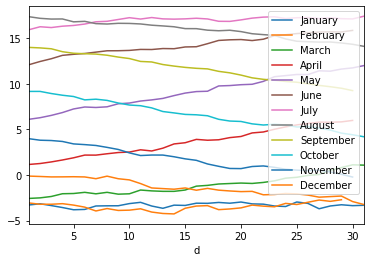

In [108]:
#1 var
gr = df.groupby(["m", "d"]).mean()
gr["t"] = gr.loc[:,"t1":"t3"].mean(axis=1)


_, ax = plt.subplots()


for m in range(1,13):
     gr.loc[(m, ), "t"].plot(y="t", ax=ax)
    
ax.legend(list(calendar.month_name)[1:])
plt.show()

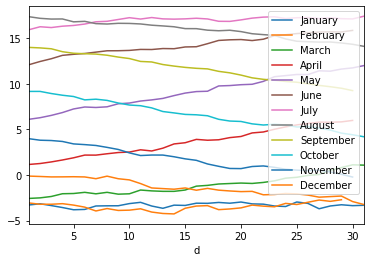

In [109]:
#2 var
gr1 = df.groupby(["m", "d"]).mean()
gr1["t"] = gr1.loc[:,"t1":"t3"].mean(axis=1)

_, ax = plt.subplots()


for m in range(1,13):
    gr1.xs(m, level='m').plot(y="t", ax=ax)
    
ax.legend(list(calendar.month_name)[1:])
plt.show()